In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [110]:
train = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Data Understanding

In [111]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [112]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [113]:
train.shape

(8523, 12)

In [114]:
test_data.shape

(5681, 11)

In [115]:
train.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1712,FDQ09,7.235,Low Fat,0.058223,Snack Foods,114.8834,OUT049,1999,Medium,Tier 1,Supermarket Type1,3340.3186
457,FDB14,20.250,Regular,0.102724,Canned,93.2120,OUT046,1997,Small,Tier 1,Supermarket Type1,1957.4520
2192,FDY45,17.500,Low Fat,0.000000,Snack Foods,253.0356,OUT035,2004,Small,Tier 2,Supermarket Type1,4578.0408
941,FDA43,10.895,Low Fat,0.064622,Fruits and Vegetables,196.6794,OUT013,1987,High,Tier 3,Supermarket Type1,1170.4764
7449,FDU07,11.100,Low Fat,0.059940,Fruits and Vegetables,149.1366,OUT049,1999,Medium,Tier 1,Supermarket Type1,4231.8248


In [116]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [117]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [118]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [119]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [120]:
train.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [121]:
test_data.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

In [122]:
train.duplicated().sum()

0

In [123]:
test_data.duplicated().sum()

0

# Data Cleaning

In [124]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [125]:
train = train.drop(columns=["Item_Identifier"])
test = test_data.drop(columns=["Item_Identifier"])

In [126]:
train["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [127]:
test["Item_Fat_Content"].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [128]:
train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [129]:
for i in range(len(train["Item_Fat_Content"])):
    if train["Item_Fat_Content"][i] == "LF" or train["Item_Fat_Content"][i] == "low fat":
        train["Item_Fat_Content"][i] = "Low Fat"
    elif train["Item_Fat_Content"][i] == "reg":
        train["Item_Fat_Content"][i] = "Regular"

#test data
for i in range(len(test["Item_Fat_Content"])):
    if test["Item_Fat_Content"][i] == "LF" or test["Item_Fat_Content"][i] == "low fat":
        test["Item_Fat_Content"][i] = "Low Fat"
    elif test["Item_Fat_Content"][i] == "reg":
        test["Item_Fat_Content"][i] = "Regular"

C:\Users\mohit\AppData\Local\Temp\ipykernel_4324\4047969179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Item_Fat_Content"][i] = "Low Fat"
C:\Users\mohit\AppData\Local\Temp\ipykernel_4324\4047969179.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Item_Fat_Content"][i] = "Regular"
C:\Users\mohit\AppData\Local\Temp\ipykernel_4324\4047969179.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Item_Fat_Conte

In [130]:
train["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [131]:
test["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [132]:
train["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [133]:
train["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [134]:
train["Outlet_Identifier"].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [135]:
train["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [136]:
train["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [137]:
train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [138]:
train["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [139]:
train["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [140]:
train["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [141]:
train["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

Null Value Imputation 1

In [142]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [143]:
train.isnull().mean()*100

Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [144]:
train["Item_Weight"] = train["Item_Weight"].fillna(train["Item_Weight"].mean())

In [145]:
train["Outlet_Size"] = train["Outlet_Size"].fillna(train["Outlet_Size"].mode()[0])

In [146]:
train.isnull().mean()*100

Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [147]:
test["Item_Weight"] = test["Item_Weight"].fillna(test["Item_Weight"].mean())
test["Outlet_Size"] = test["Outlet_Size"].fillna(test["Outlet_Size"].mode()[0])

In [148]:
test.isnull().mean()*100

Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
dtype: float64

# Exploratory Data Analysis

In [149]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [150]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


Univariant Analysis

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


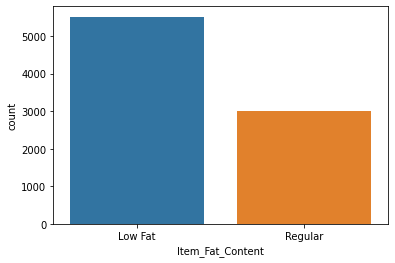

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


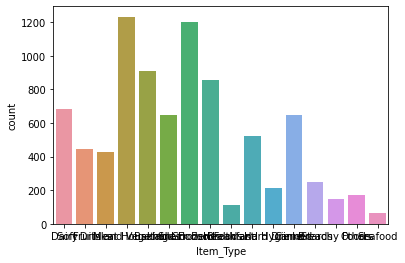

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


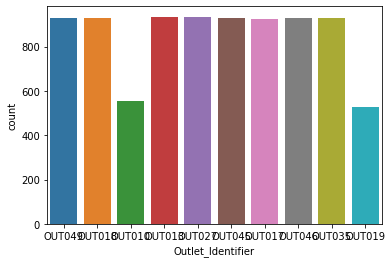

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


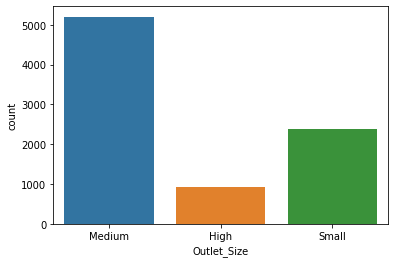

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


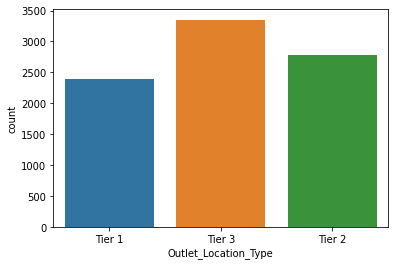

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


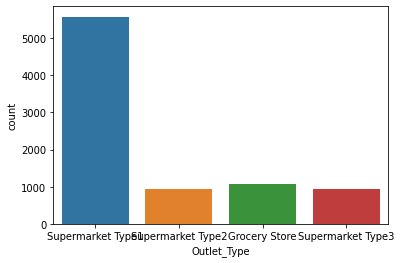

In [151]:
# Bar Plot
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "object":
        plt.show(sns.countplot(train[train.columns[i]]))

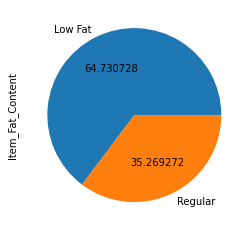

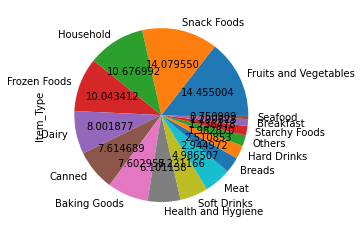

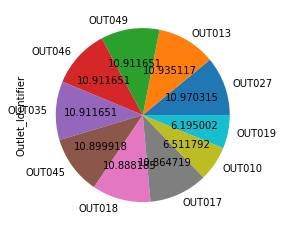

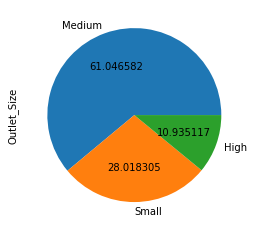

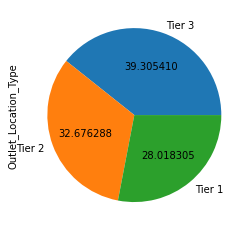

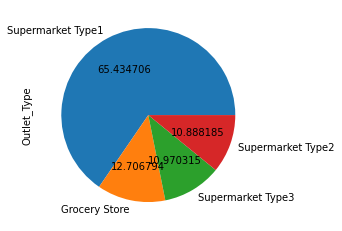

In [152]:
# Pie Chart
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "object":
        plt.show(train[train.columns[i]].value_counts().plot(kind="pie", autopct="%2f"))

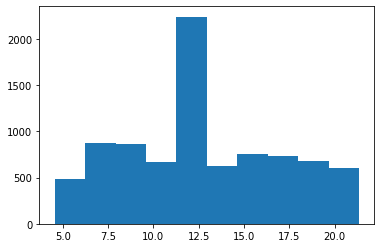

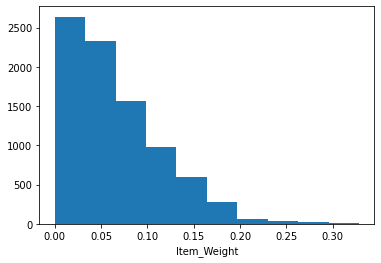

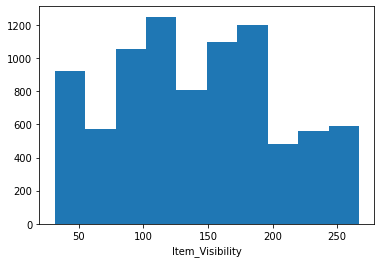

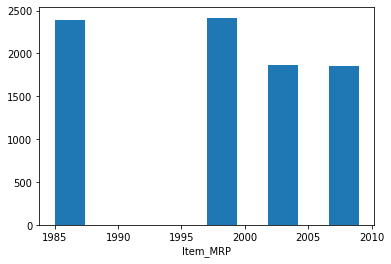

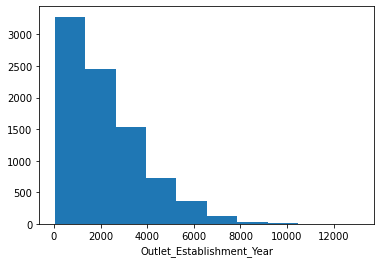

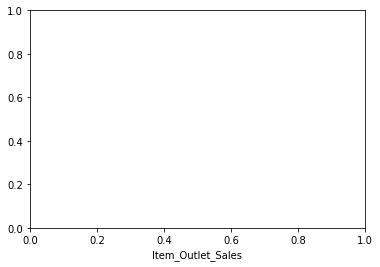

In [153]:
# Histogram
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        plt.show(plt.hist(train[train.columns[i]]))
        plt.xlabel(train.columns[i])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


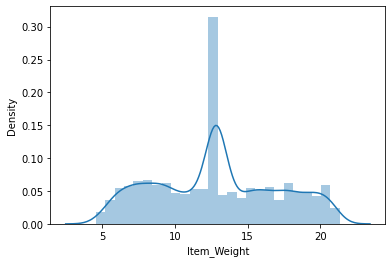

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


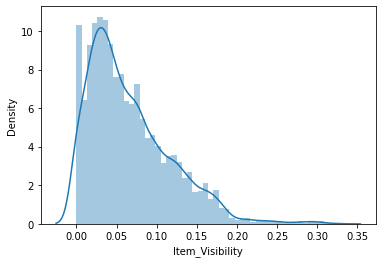

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


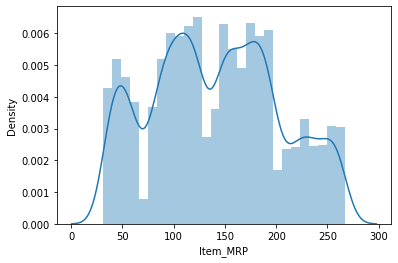

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


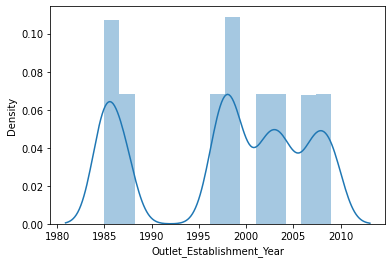

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


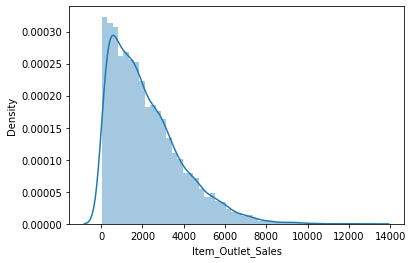

In [154]:
# Distplot
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        plt.show(sns.distplot(train[train.columns[i]]))
        #plt.xlabel(train.columns[i])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


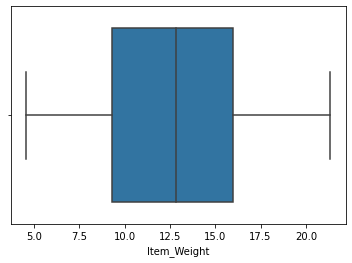

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


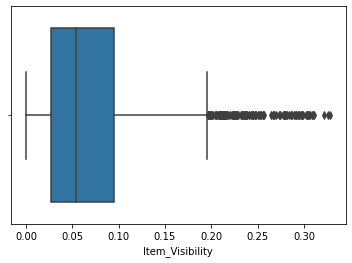

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


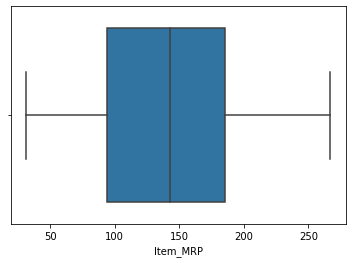

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


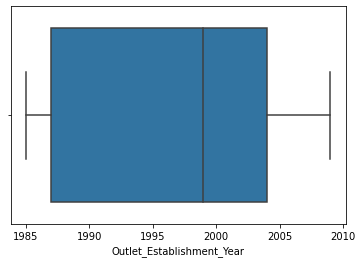

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


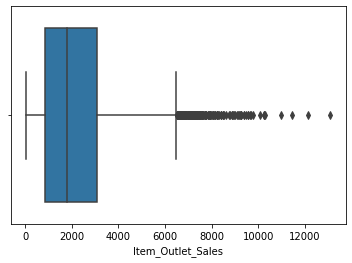

In [155]:
# Boxplot
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(train[train.columns[i]]))
        #plt.xlabel(train.columns[i])

Bivariant Analysis

In [156]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Numeriacl - Numerical

1. ScatterPlot

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Visibility'>

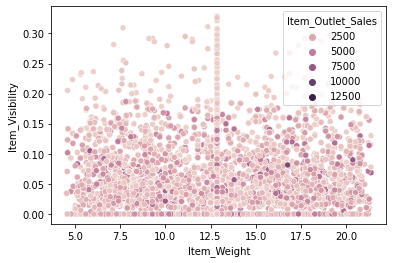

In [157]:
sns.scatterplot(train["Item_Weight"], train["Item_Visibility"], hue=train["Item_Outlet_Sales"])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight', ylabel='Outlet_Establishment_Year'>

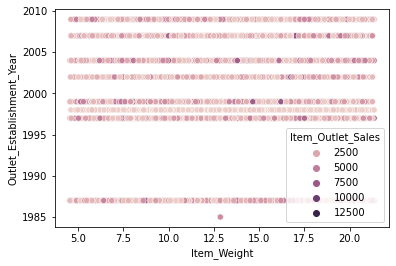

In [158]:
sns.scatterplot(train["Item_Weight"], train["Outlet_Establishment_Year"], hue=train["Item_Outlet_Sales"])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight', ylabel='Item_MRP'>

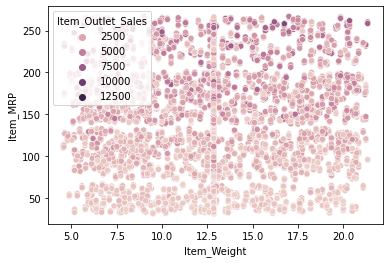

In [159]:
sns.scatterplot(train["Item_Weight"], train["Item_MRP"], hue=train["Item_Outlet_Sales"])

Numericaal - Categorical

In [160]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Bar PLot

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


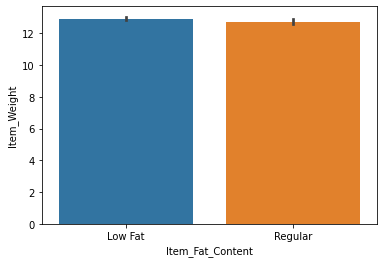

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


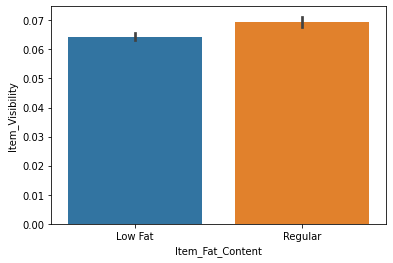

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


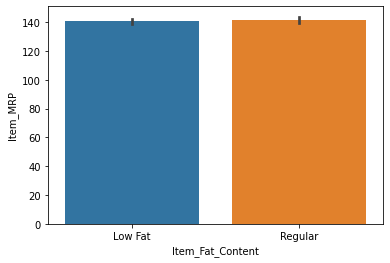

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


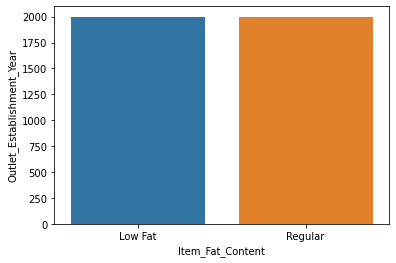

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


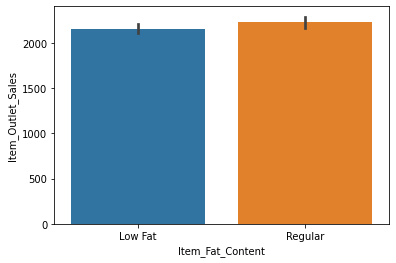

In [161]:
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        plt.show(sns.barplot(train["Item_Fat_Content"], train[train.columns[i]]))

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


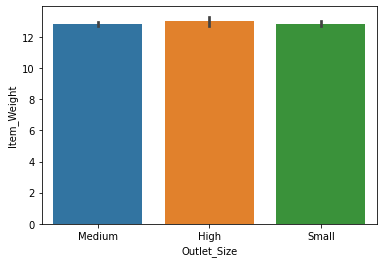

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


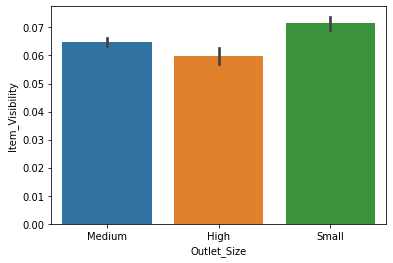

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


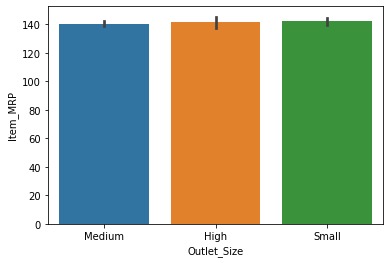

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


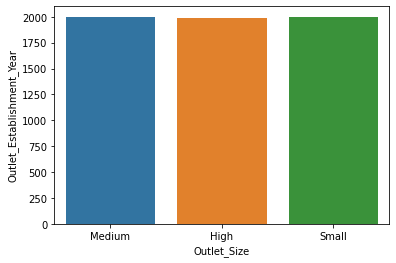

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


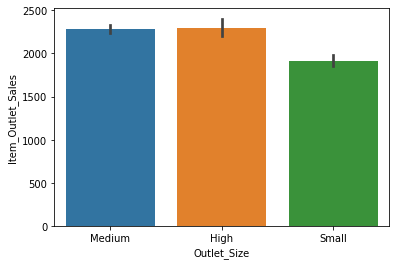

In [162]:
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        plt.show(sns.barplot(train["Outlet_Size"], train[train.columns[i]]))

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


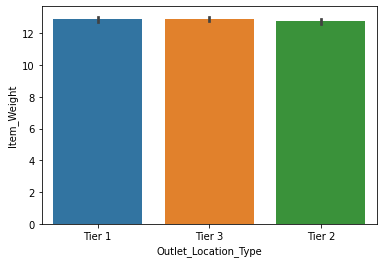

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


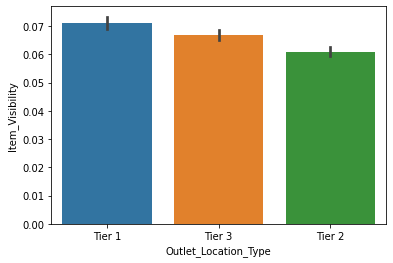

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


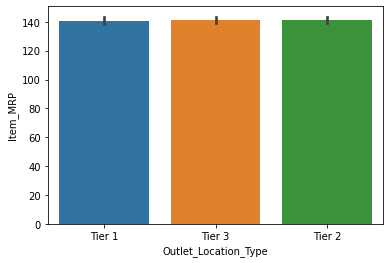

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


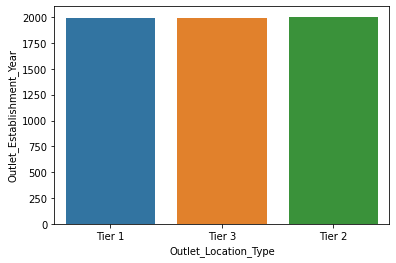

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


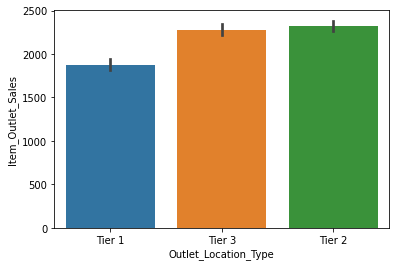

In [163]:
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        plt.show(sns.barplot(train["Outlet_Location_Type"], train[train.columns[i]]))

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


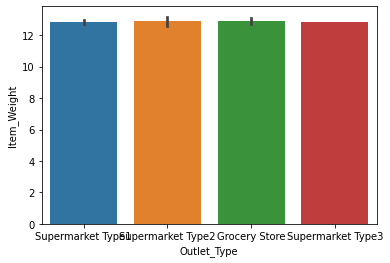

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


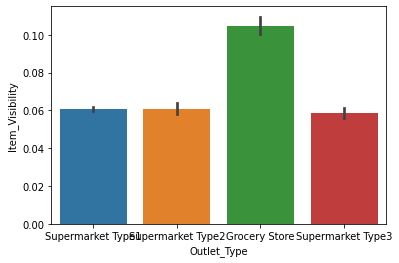

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


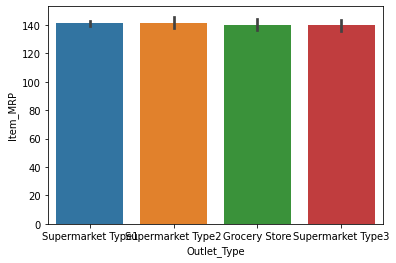

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


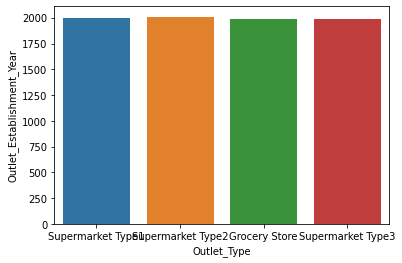

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


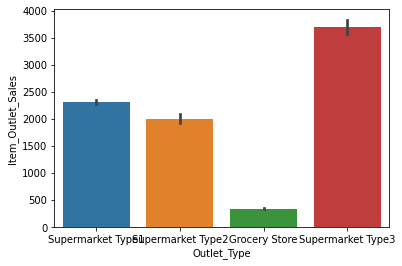

In [164]:
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        plt.show(sns.barplot(train["Outlet_Type"], train[train.columns[i]]))

Box Plot

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


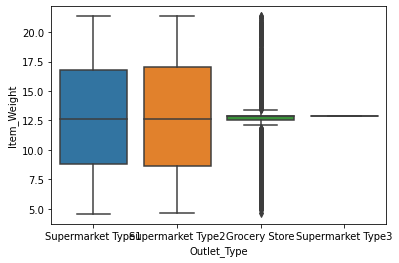

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


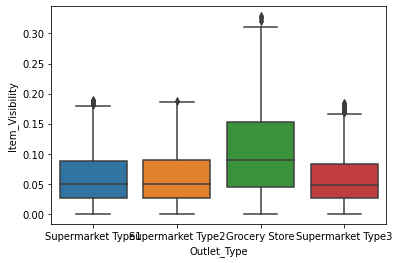

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


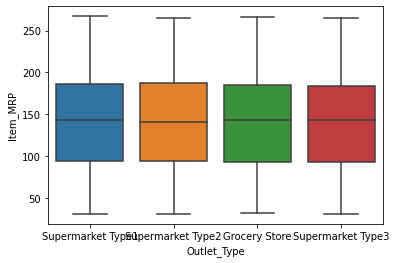

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


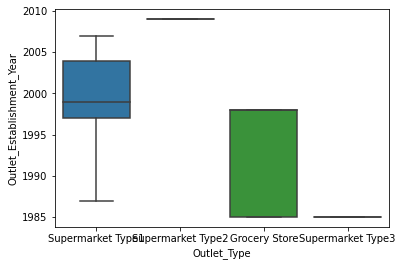

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


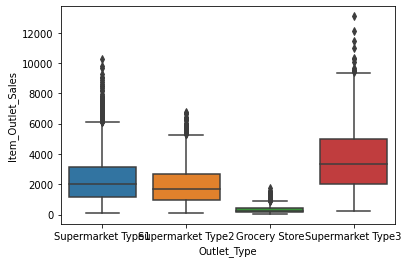

In [165]:
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(train["Outlet_Type"], train[train.columns[i]]))

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


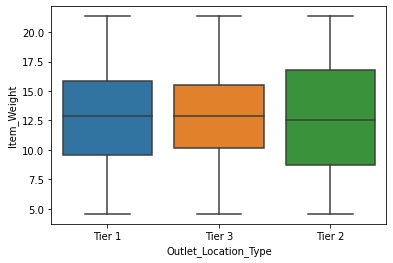

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


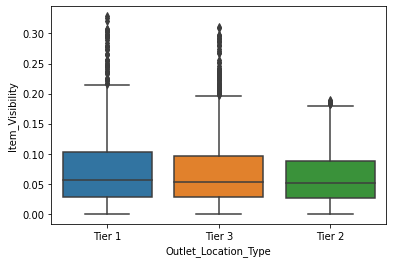

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


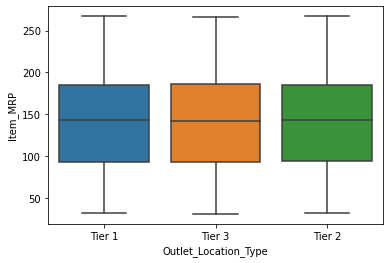

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


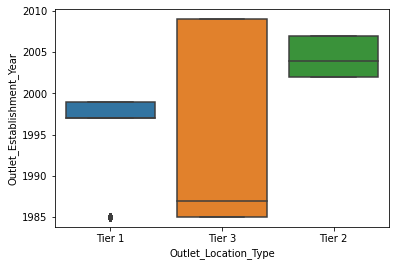

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


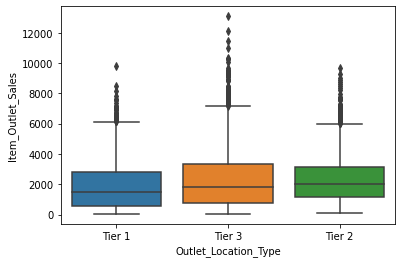

In [166]:
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(train["Outlet_Location_Type"], train[train.columns[i]]))

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


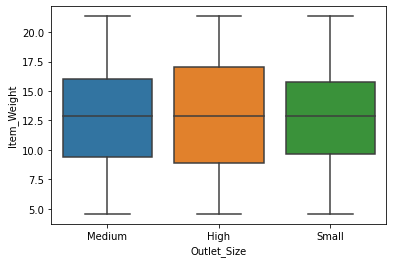

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


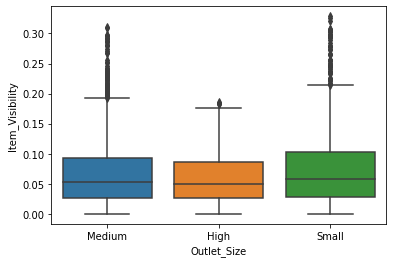

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


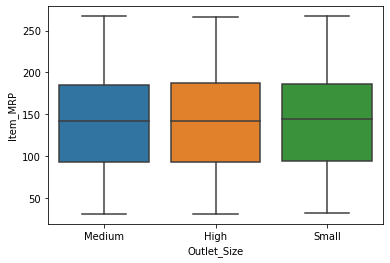

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


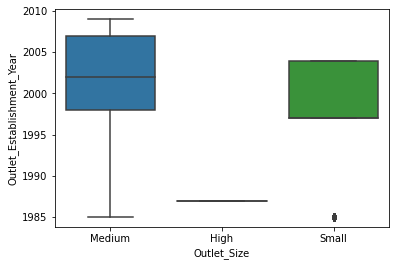

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


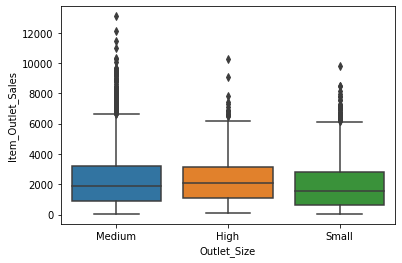

In [167]:
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(train["Outlet_Size"], train[train.columns[i]]))

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


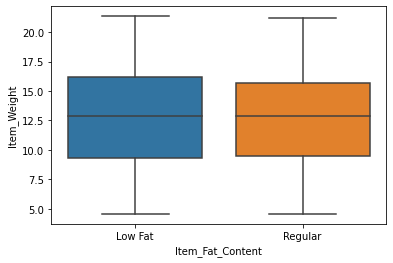

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


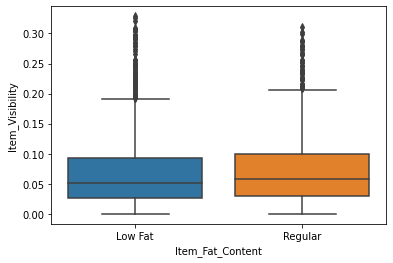

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


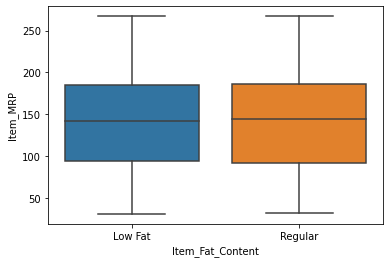

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


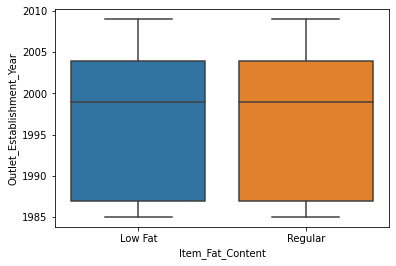

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


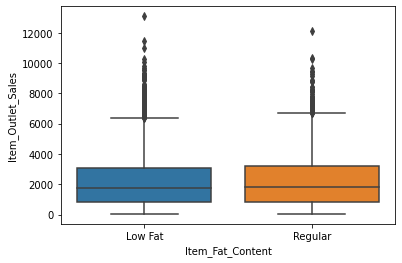

In [168]:
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(train["Item_Fat_Content"], train[train.columns[i]]))

Categorical - Categorical

In [169]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


HeatMap

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Fat_Content'>

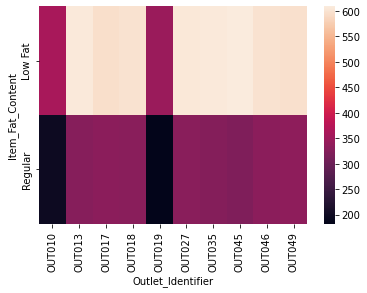

In [170]:
sns.heatmap(pd.crosstab(train["Item_Fat_Content"], train["Outlet_Identifier"]))

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Fat_Content'>

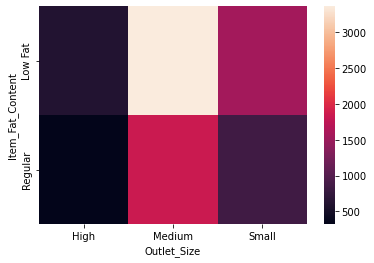

In [171]:
sns.heatmap(pd.crosstab(train["Item_Fat_Content"], train["Outlet_Size"]))

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Fat_Content'>

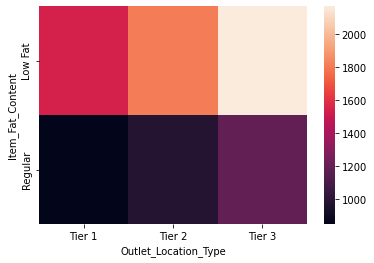

In [172]:
sns.heatmap(pd.crosstab(train["Item_Fat_Content"], train["Outlet_Location_Type"]))

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Fat_Content'>

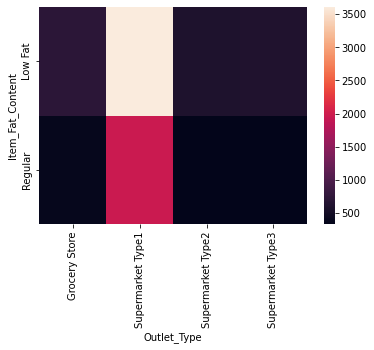

In [173]:
sns.heatmap(pd.crosstab(train["Item_Fat_Content"], train["Outlet_Type"]))

Multivariant Analysis

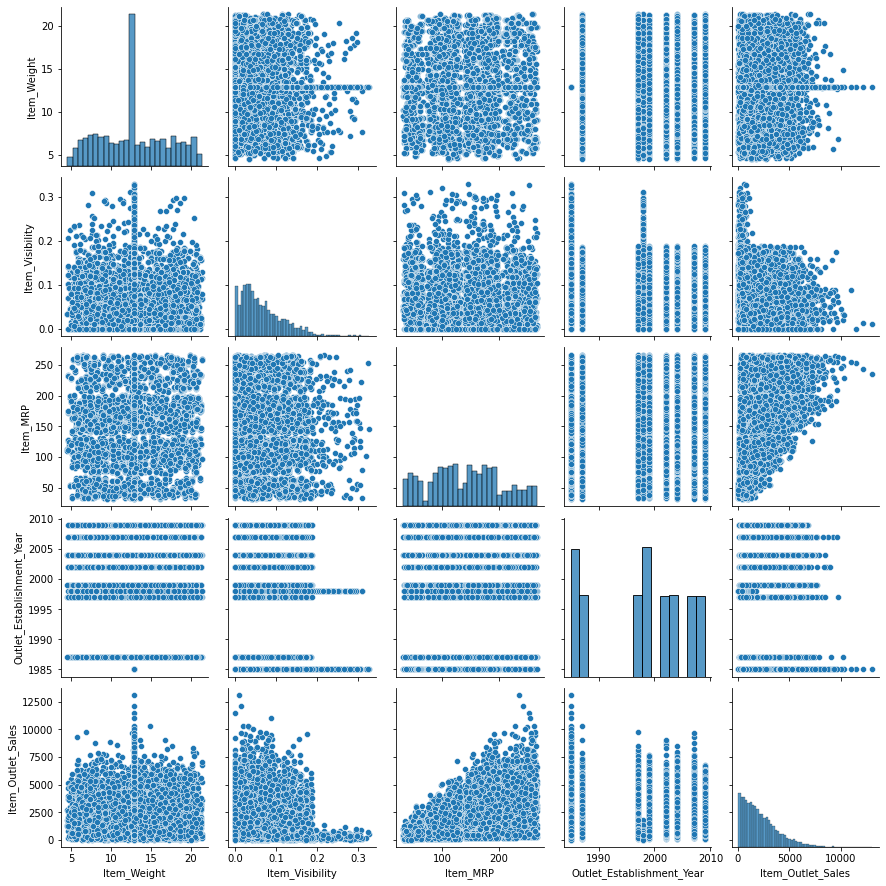

In [174]:
#sns.pairplot(train, hue ="species")
sns.pairplot(train)

In [175]:
train.shape

(8523, 11)

In [176]:
test.shape

(5681, 10)

# Feature Transformation

In [177]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


2. Handling Categorical Features 

3. Feature Scaling - Normalization

In [178]:
x = train.iloc[:,:-1]
y = train.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [179]:
x_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
7173,11.800000,Regular,0.057422,Meat,149.9366,OUT046,1997,Small,Tier 1,Supermarket Type1
3315,12.857645,Low Fat,0.000000,Baking Goods,100.1384,OUT027,1985,Medium,Tier 3,Supermarket Type3
5932,7.725000,Low Fat,0.047783,Canned,249.1092,OUT046,1997,Small,Tier 1,Supermarket Type1
7872,10.500000,Low Fat,0.052555,Frozen Foods,89.6830,OUT046,1997,Small,Tier 1,Supermarket Type1
5946,12.857645,Regular,0.235859,Snack Foods,46.1402,OUT019,1985,Small,Tier 1,Grocery Store


In [180]:
y_train.head()

7173    1662.5026
3315    2956.1520
5932    2490.0920
7872     988.7130
5946      45.9402
Name: Item_Outlet_Sales, dtype: float64

In [181]:
transformer = ColumnTransformer(transformers=[
    ("tnf1", OneHotEncoder(drop="first", sparse=False), ["Item_Fat_Content", "Item_Type", "Outlet_Identifier", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]),
    ("tnf2", StandardScaler(), ["Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_Establishment_Year"])
], remainder="passthrough")

In [182]:
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

In [183]:
test_transformed = transformer.transform(test)

In [184]:
x_train.shape

(6818, 36)

# Model Building

**Linear Regression**

In [77]:
prepro = PolynomialFeatures(degree=2, include_bias=True)
x_train_tr = prepro.fit_transform(x_train)
x_test_tr = prepro.transform(x_test)

In [78]:
lr = LinearRegression()
model = lr.fit(x_train_tr,y_train)
pred = model.predict(x_test_tr)
print(r2_score(y_test, pred)*100)
print(mean_absolute_error(y_test, pred))

57.660731827864886
807.0359438123168


In [79]:
score = []
for i in range(500):
    x = train.iloc[:,:-1]
    y = train.iloc[:,-1]

    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=i)
    
    x_train = transformer.fit_transform(x_train)
    x_test = transformer.transform(x_test)
    
    prepro = PolynomialFeatures(degree=2, include_bias=True)
    x_train_tr = prepro.fit_transform(x_train)
    x_test_tr = prepro.transform(x_test)
    
    lr = LinearRegression()
    lr.fit(x_train_tr,y_train)
    pred = lr.predict(x_test_tr)
    score.append(r2_score(y_test,pred)*100)
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  230
65.14225408590299


In [197]:
lr = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=np.argmax(score))
    
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

prepro = PolynomialFeatures(degree=2, include_bias=True)
x_train_tr = prepro.fit_transform(x_train)
x_test_tr = prepro.transform(x_test)

model1 = lr.fit(x_train_tr,y_train)
pred = model1.predict(x_test_tr)
r2_score(y_test, pred)*100

65.14225408590299

In [81]:
# Training Data Accuracy

pred = model1.predict(x_train_tr)
r2_score(y_train, pred)*100     #Underfitting

60.6193934431873

In [82]:
#CROSS VALIDATION TO CHECK WHETHER THE MODEL IS GENERALIZED OR NOT

mod1 = cross_val_score(LinearRegression(), x_train_tr, y_train, cv=10)
print(mod1)
print(np.round(np.mean(mod1),2)*100)

[0.55667735 0.55251313 0.56374992 0.59425747 0.55416559 0.54669531
 0.53579447 0.62097774 0.5990897  0.61024589]
56.99999999999999


**Decision Tree Regressor**

In [83]:
parameters = {
    "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "splitter": ["best", "random"],
    "max_depth": [3,4,5,6,7,8],
    "max_features": ["sqrt", "log2"],
    "random_state": [i for i in range(10)]
}
gs = GridSearchCV(
    estimator = DecisionTreeRegressor(),
    param_grid = parameters,
    scoring = "r2",
    n_jobs = -1,
    cv = 5,
    verbose = 4
)

In [84]:
d = gs.fit(x_train, y_train)
print(d.best_score_*100)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits
51.3257475108406


In [85]:
d.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=8,
                      max_features='sqrt', random_state=3)

In [91]:
dtr = DecisionTreeRegressor(criterion='friedman_mse', max_depth=8,
                      max_features='sqrt', random_state=3)
model = dtr.fit(x_train,y_train)
pred = model.predict(x_test)
print(r2_score(y_test, pred)*100)
print(mean_absolute_error(y_test, pred))

51.955706659316434
828.1983307395553


In [ ]:
# for imp, name in sorted(zip(model.feature_importances_, x_train.columns), reverse=True):
#     print(name, imp)

In [92]:
score = []
for i in range(500):
    x = train.iloc[:,:-1]
    y = train.iloc[:,-1]

    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=i)
    
    x_train = transformer.fit_transform(x_train)
    x_test = transformer.transform(x_test)
    
    dtr = DecisionTreeRegressor(criterion='friedman_mse', max_depth=8,
                      max_features='sqrt', random_state=3)
    dtr.fit(x_train,y_train)
    pred = dtr.predict(x_test)
    score.append(r2_score(y_test,pred)*100)
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  491
60.516784177329995


In [95]:
dtr = DecisionTreeRegressor(criterion='friedman_mse', max_depth=8,
                      max_features='sqrt', random_state=3)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=np.argmax(score))
    
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

model2 = dtr.fit(x_train,y_train)
pred = model2.predict(x_test)
r2_score(y_test, pred)*100

60.516784177329995

In [96]:
# Training Data Accuracy

pred = model2.predict(x_train)
r2_score(y_train, pred)*100     #Underfitting

58.54499399339941

In [97]:
#CROSS VALIDATION TO CHECK WHETHER THE MODEL IS GENERALIZED OR NOT

mod2 = cross_val_score(DecisionTreeRegressor(criterion='friedman_mse', max_depth=8,
                      max_features='sqrt', random_state=3), x_train, y_train, cv=10)
print(mod2)
print(np.round(np.mean(mod2),2)*100)

[0.53559786 0.52791453 0.48721299 0.52353023 0.53620436 0.54305274
 0.53821736 0.43740164 0.49845674 0.50828416]
51.0


**Random Forest Regressor**

In [86]:
parameters = {
    "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "max_depth": [3,4,5,6],
    "max_features": ["sqrt", "log2"],
    "random_state": [i for i in range(5)]
}
gs = GridSearchCV(
    estimator = RandomForestRegressor(),
    param_grid = parameters,
    scoring = "r2",
    n_jobs = -1,
    cv = 5,
    verbose = 4
)

In [87]:
d = gs.fit(x_train, y_train)
print(d.best_score_*100)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
49.84874643441788


In [88]:
d.best_estimator_

RandomForestRegressor(criterion='friedman_mse', max_depth=6,
                      max_features='sqrt', random_state=4)

In [98]:
rfr = RandomForestRegressor(criterion='friedman_mse', max_depth=6,
                      max_features='sqrt', random_state=4)
model = rfr.fit(x_train,y_train)
pred = model.predict(x_test)
r2_score(y_test, pred)*100

52.71017865495345

In [99]:
score = []
for i in range(500):
    x = train.iloc[:,:-1]
    y = train.iloc[:,-1]

    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=i)
    
    x_train = transformer.fit_transform(x_train)
    x_test = transformer.transform(x_test)
    
    rfr = RandomForestRegressor(criterion='friedman_mse', max_depth=6,
                      max_features='sqrt', random_state=4)
    rfr.fit(x_train,y_train) 
    pred = rfr.predict(x_test)
    score.append(r2_score(y_test,pred)*100)
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  289
55.55301701661539


In [100]:
rfr = RandomForestRegressor(criterion='friedman_mse', max_depth=6,
                      max_features='sqrt', random_state=4)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=np.argmax(score))
    
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

model3 = rfr.fit(x_train,y_train)
pred = model3.predict(x_test)
r2_score(y_test, pred)*100

55.55301701661539

In [191]:
pred

array([1625.36807131, 2641.69425846,  736.96386178, ..., 1563.82274092,
        422.17255287, 2841.07922829])

In [101]:
# Training Data Accuracy
pred = model3.predict(x_train)
r2_score(y_train, pred)*100     #Underfitting

52.06375826330962

In [102]:
#CROSS VALIDATION TO CHECK WHETHER THE MODEL IS GENERALIZED OR NOT

mod3 = cross_val_score(RandomForestRegressor(criterion='friedman_mse', max_depth=6,
                      max_features='sqrt', random_state=4), x_train, y_train, cv=10)
print(mod3)
print(np.round(np.mean(mod3),2)*100)

[0.51044038 0.49672601 0.47485199 0.55004548 0.49008276 0.46802299
 0.52370319 0.51986602 0.48032032 0.50056157]
50.0


In [198]:
test_pred = model2.predict(test_transformed)
test_pred

array([1635.68687689, 1000.23285318,  567.33221515, ..., 1796.88814336,
       3930.6807968 , 1000.23285318])

In [190]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [199]:
submission = pd.DataFrame({"Item_Identifier": test_data["Item_Identifier"], 
                           "Outlet_Identifier": test_data["Outlet_Identifier"],
                           "Item_Outlet_Sales": test_pred})

In [200]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1635.686877
1,FDW14,OUT017,1000.232853
2,NCN55,OUT010,567.332215
3,FDQ58,OUT017,2317.375647
4,FDY38,OUT027,6602.248011


In [201]:
submission.to_csv('Big_MartSales_Prediction_submission.csv', index=False)